# ☕ Maven Roasters Data Analytics Project

**Dataset Source**: [Kaggle - Coffee Shop Sales & Revenue Data](https://www.kaggle.com/datasets/agungpambudi/trends-product-coffee-shop-sales-revenue-dataset)

## 📝 Project Overview

This project explores transactional sales data from Maven Roasters, a fictional NYC-based coffee shop with three locations. The dataset includes detailed records such as transaction timestamps, products sold, store locations, and prices.

The goal is to uncover actionable insights through data analytics to support decision-making in marketing, inventory, and operations.

## 🎯 Objectives

- Identify best-selling and most profitable products.
- Find out who the best clients are (e.g., loyal or high-spending).
- Analyze the impact of discounts on revenue and customer count.
- Discover optimal times to sell coffee (seasons, days of the week, times of day).
- Compare store performance by location.
- Recommend strategies to boost sales and efficiency.

## 🔍 Key Questions

- What are the top products in terms of sales and revenue?
- Which customers generate the most value?
- What happens to sales when a discount is applied?
- What is the best time/day/season to sell coffee?
- Which store performs best and why?

## 🛠️ Tools

- Python (Pandas, Seaborn, Matplotlib, Scikit-learn)
- SQL
- Tableau / Power BI
- Jupyter Notebook
- Excel

---


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
coffee = pd.read_csv('/Users/victorhugo/Documents/Data Science/Project_Git/coffee_data/coffee-shop-sales-revenue.csv',sep = '|')

In [4]:
coffee.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [21]:
print(coffee.isnull().sum())
# Check for duplicates
print(coffee.duplicated().sum())



transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
total_price         0
dtype: int64
0


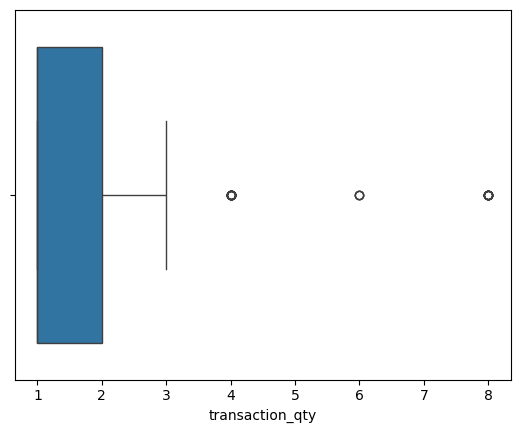

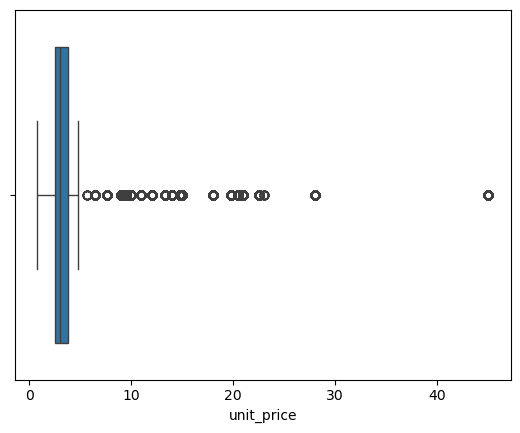

In [22]:
# is there any outlier for transaction or unit ?

sns.boxplot(x=coffee['transaction_qty'])
plt.show()

sns.boxplot(x=coffee['unit_price'])
plt.show()

In [8]:
# Getting how many locations (stores) and how many products

unique_locations = coffee['store_id'].unique()
print( " Unique store locations: ",unique_locations)
print( " Number of store locations: ",len(unique_locations))

print( " ------------------------------------ \n ")

unique_products = coffee['product_type'].unique()
print(" Which products the retailer sells: ",unique_products)
print(" How many different products: ", len(unique_products))


# So there are 29 products sold in 3 stores.

# All products are sold in each store ?

 Unique store locations:  [5 8 3]
 Number of store locations:  3
 ------------------------------------ 
 
 Which products the retailer sells:  ['Gourmet brewed coffee' 'Brewed Chai tea' 'Hot chocolate' 'Drip coffee'
 'Scone' 'Barista Espresso' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed herbal tea' 'Biscotti' 'Pastry' 'Organic brewed coffee'
 'Premium brewed coffee' 'Regular syrup' 'Herbal tea' 'Gourmet Beans'
 'Organic Beans' 'Sugar free syrup' 'Drinking Chocolate' 'Premium Beans'
 'Chai tea' 'Green beans' 'Espresso Beans' 'Green tea' 'Organic Chocolate'
 'Housewares' 'Black tea' 'House blend Beans' 'Clothing']
 How many different products:  29


In [9]:
# Finding the best selling products. First by all 3 stores, then sorted by store 

coffee['total_price'] = coffee['transaction_qty']*coffee['unit_price']
top_products_by_revenue = (
    coffee.groupby('product_category')['total_price']
    .sum()
    .sort_values(ascending = False )
)

print(top_products_by_revenue)

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: total_price, dtype: float64


/var/folders/tz/tl_w5k6s62vcg00cl2mjjbtc0000gn/T/ipykernel_42667/4091560411.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=normalized_revenue.index, y=normalized_revenue.values, palette='viridis')


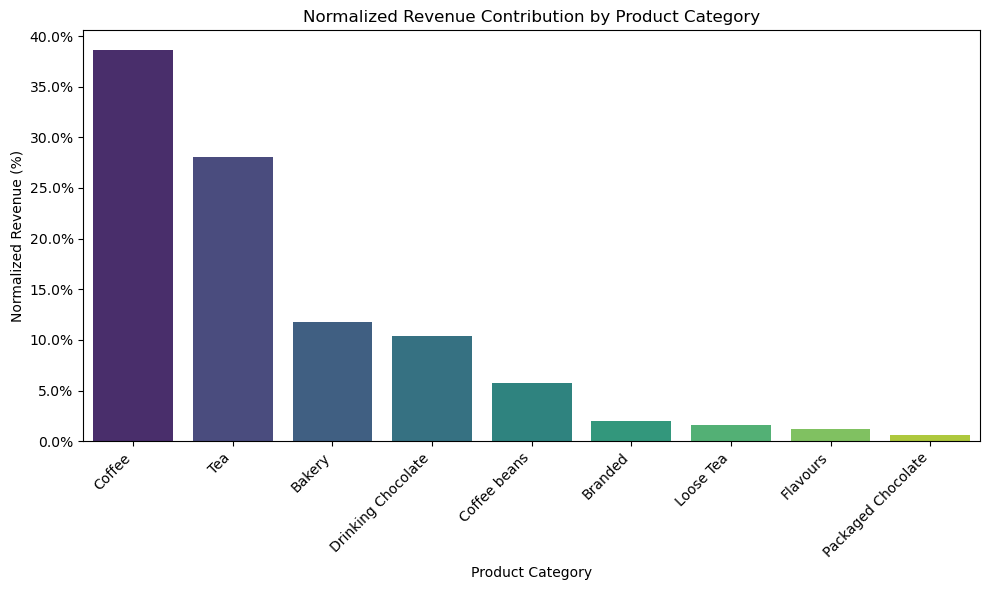

In [15]:
# Let's Normalize it and plot it 

total_revenue = top_products_by_revenue.sum()
normalized_revenue = top_products_by_revenue*100 / total_revenue 

#Plotting normalized

# Plotting normalized revenue
plt.figure(figsize=(10, 6))
sns.barplot(x=normalized_revenue.index, y=normalized_revenue.values, palette='viridis')
plt.title('Normalized Revenue Contribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Normalized Revenue (%)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Now let`s see by Volume

/var/folders/tz/tl_w5k6s62vcg00cl2mjjbtc0000gn/T/ipykernel_42667/4122773475.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_qty_by_product.index, y=total_qty_by_product.values, palette='Blues')


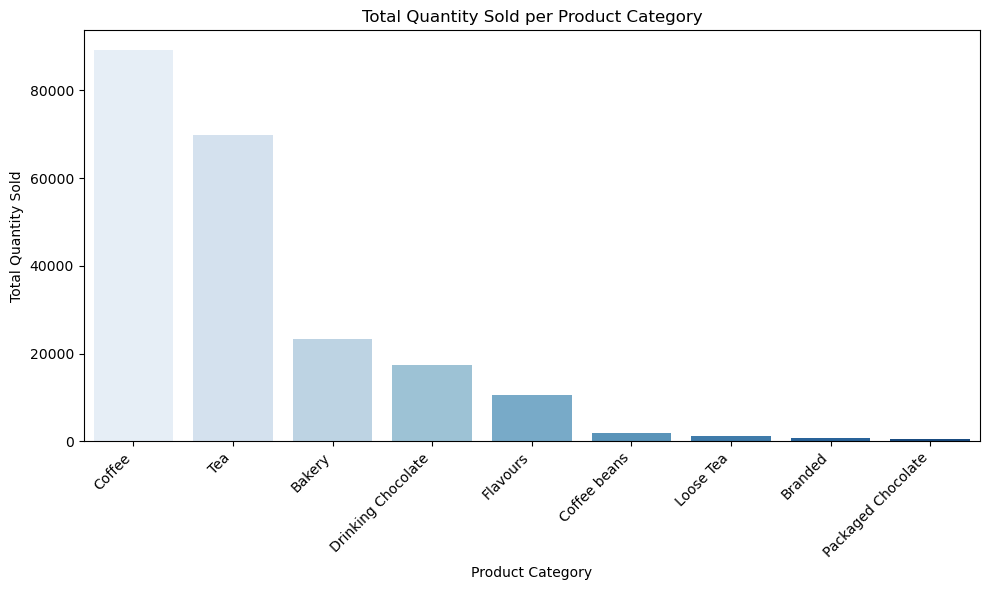

In [16]:
# Group by product_category to get total quantity sold
total_qty_by_product = coffee.groupby('product_category')['transaction_qty'].sum().sort_values(ascending=False)

# Plotting actual sales numbers (quantity sold per product)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_qty_by_product.index, y=total_qty_by_product.values, palette='Blues')
plt.title('Total Quantity Sold per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

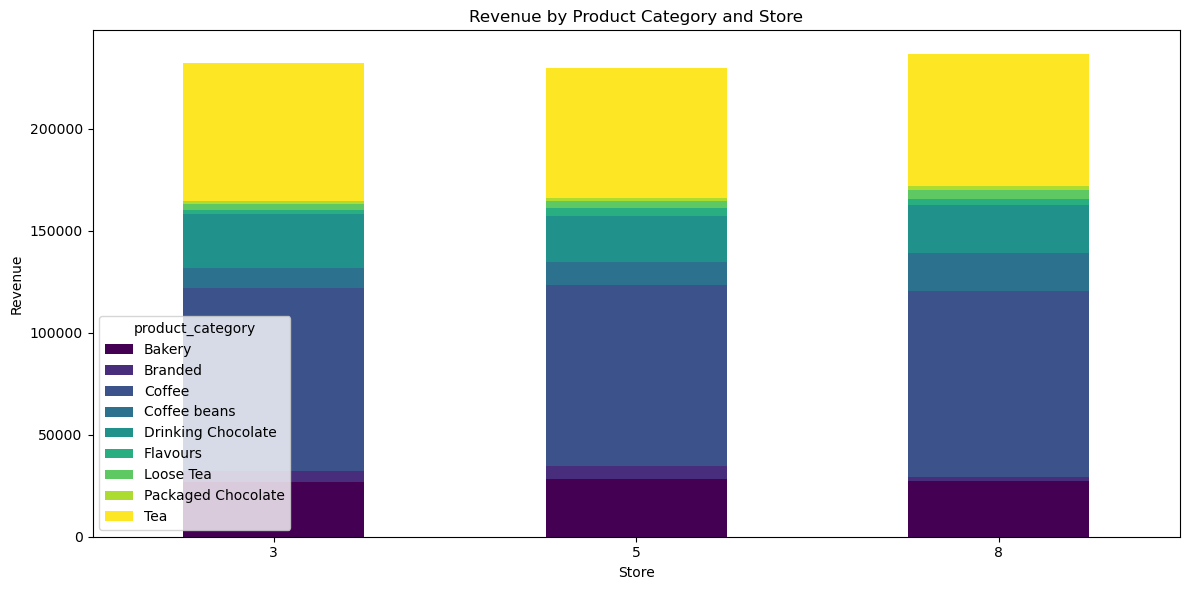

In [17]:
# Now by store 

revenue_by_store_product = (
    coffee.groupby(['store_id', 'product_category'])['total_price']
    .sum()
    .unstack()
    .fillna(0)
)

# Plotting stacked bar chart
revenue_by_store_product.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')
plt.title('Revenue by Product Category and Store')
plt.xlabel('Store')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()